In [ ]:
# ..... find markers for each cluster? ..... #

In [2]:
library(Seurat)
library(dplyr)

In [3]:
# gene lists
m1 = read.delim('~/septation/markers/Bayraktar_marker_genes.txt', sep = '\t')
m1[1:2,]

ctypes = m1$Cluster
top_markers = c()

for(ii in 1:length(ctypes)){
    temp = data.frame(compartment = m1$Compartment[ii], 
                      subtype = m1$Subtype[ii], cluster = m1$Cluster[ii],
                      gene = unique(unlist(stringr::str_split(m1$Gene[ii], ','))))
    top_markers = rbind(top_markers, temp)
}
top_markers[1:3,]

Compartment    Subtype              Cluster                  
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft 
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesRight
  Gene                                                                                                
1 TNNT2,ACTN2,LDB3,CSRP3,SMPX,KCNMB2,PCDH7,RYR3,PANCR,MBP,NAV3,PITX2,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2  
2 TNNT2,ACTN2,LDB3,CSRP3,SMPX,NTM,ROR1,KIF26B,PLC1,ANGPT1,BRINP3,BMP10,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2
  Comments                                                
1 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al
2 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al

compartment    subtype              cluster                  gene 
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft TNNT2
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft ACTN2
3 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft LDB3

In [4]:
# load list of orthologs
om = read.delim('human_turtle_orthologs_biomart.txt', sep = '\t')
colnames(om) <- c('human', 'turtle', 'LCA', 'homology_type', 'orthology_confidence')
om <- om[om[,1]!='' & om[,2]!='' & om$homology_type=='ortholog_one2one',]
dim(om)
om[1,]

[1] 13091     5

human  turtle LCA        homology_type    orthology_confidence
11 MT-ND2 ND2    Vertebrata ortholog_one2one 1

In [5]:
papers = c('Asp', 'Feng', 'Hill', 'Knight-Schrijver', 'Mantri', 'Qiu', 
           'Farah', 'Kanemaru', 'Xu', 'Cui')

cols1 = c('predicted', 'predicted', 'predicted', 'class', 'predicted', 'class',
          'predicted', 'class', 'predicted', 'predicted')

In [6]:
# get list of samples
stages = rep(c('stage14', 'stage17', 'stage21'), each = 3)
samples = paste0('sample', c('4', '7', '8A', '3_Triangle', '5B', '5Y', '1A', '1B', '2'))

In [7]:
# load data
id = 4
file0 = paste0(stages[id], '_', samples[id], '_data.rds')
paste0(stages[id], '_', samples[id])

sce = readRDS(file0)
sce

[1] "stage17_sample3_Triangle"

An object of class Seurat 
26985 features across 7791 samples within 1 assay 
Active assay: RNA (26985 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [8]:
files0 = list.files('annotations/')
files1 = files0[grep(paste0(stages[id], '_', samples[id]), files0)]
files1

[1] "stage17_sample3_Triangle_Asp_celltypes.csv"               
 [2] "stage17_sample3_Triangle_Cui_celltypes.csv"               
 [3] "stage17_sample3_Triangle_Farah_celltypes.csv"             
 [4] "stage17_sample3_Triangle_Feng_celltypes.csv"              
 [5] "stage17_sample3_Triangle_Hill_celltypes.csv"              
 [6] "stage17_sample3_Triangle_Kanemaru_celltypes.csv"          
 [7] "stage17_sample3_Triangle_Knight-Schrijver_celltypes.csv"  
 [8] "stage17_sample3_Triangle_Mantri_celltypes.csv"            
 [9] "stage17_sample3_Triangle_Mantri_Seurat_label_transfer.csv"
[10] "stage17_sample3_Triangle_Qiu_celltypes.csv"               
[11] "stage17_sample3_Triangle_Xu_celltypes.csv"

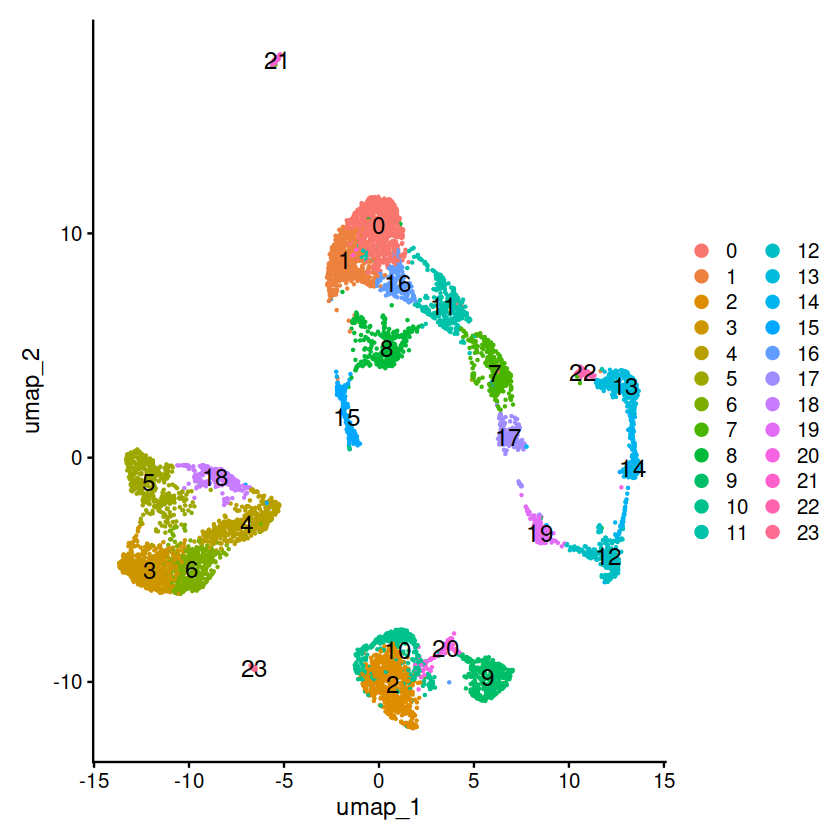

In [9]:
DimPlot(sce, reduction = 'umap', label = T, label.size = 5)
Idents(sce) <- "seurat_clusters"

In [10]:
# top markers
markers <- FindMarkers(object = sce, ident.1 = 23, only.pos = T)

# take marker gene which is not NA in human or turtle
markers$gene = om$human[match(rownames(markers), om$turtle)]
ids1 = which(!is.na(markers$gene))
head(markers)
markers$gene[ids1[1:50]]

p_val avg_log2FC pct.1 pct.2 p_val_adj gene    
LOC101942058 0     8.783043   0.867 0.006 0         NA      
DOCK8        0     8.097279   0.800 0.006 0         DOCK8   
LOC101938142 0     7.754178   0.800 0.008 0         NA      
FYB1         0     7.052521   0.767 0.008 0         NA      
LOC101954117 0     8.835605   0.733 0.008 0         NA      
ARHGAP15     0     8.797151   0.700 0.005 0         ARHGAP15

[1] "DOCK8"     "ARHGAP15"  "LCP2"      "CSF1R"     "SPI1"      "PIK3R5"   
 [7] "C1QB"      "NCF1"      "CD74"      "ALOX5"     "RGS18"     "ZBTB38"   
[13] "WDFY4"     "IRF8"      "PTPRC"     "RGS1"      "TNFAIP8L2" "P2RY12"   
[19] "BTK"       "THEMIS"    "PLD4"      "SAMSN1"    "KCNQ4"     "NFAM1"    
[25] "TM4SF19"   "PRDM1"     "CSF2RB"    "APOE"      "CYSLTR2"   "FABP7"    
[31] "VAV1"      "ELF4"      "LY86"      "MFNG"      "CD36"      "PTPN6"    
[37] "MOGAT2"    "RGS10"     "GPR65"     "SLC2A5"    "F13A1"     "BANK1"    
[43] "DNASE2B"   "ACP5"      "RAP1GAP2"  "OTULINL"   "SIGLEC1"   "GCH1"     
[49] "IGSF5"     "CD180"

In [228]:
options(warn = -1)

ctypes = unique(top_markers$cluster)
df2 = data.frame(celltype = ctypes, num_markers = NA, avg_rank = NA,
                min_rank = NA, best_gene = NA, genes = NA)

for(ii in 1:length(ctypes)){
    gset = unlist(top_markers$gene[top_markers$cluster==ctypes[ii]])
    vec2 = match(gset, rownames(markers))
    df2$num_markers[ii] = sum(!is.na(vec2))
    df2$avg_rank[ii] = round(mean(vec2, na.rm = T))
    df2$min_rank[ii] = min(vec2, na.rm = T)
    df2$best_gene[ii] = rownames(markers)[df2$min_rank[ii]]
    df2$genes[ii] = paste(rownames(markers)[sort(vec2[!is.na(vec2)])], collapse = ', ')
}

# df2 %>% filter(grepl('Fibroblasts|Pericytes|SmoothMuscleCells|EndothelialCells|Epicardial', celltype)) %>% arrange(-(num_markers)) %>% head(., 15)
df2 %>% arrange(-(num_markers)) %>% head(., 15)

celltype                                  num_markers avg_rank min_rank
1  CoronaryArterialEndothelialCells          11           441      19     
2  CoronaryVenousEndothelialCells            10           558      19     
3  LymphaticEndothelialCells                 10          2442      58     
4  GreatVesselArterialEndothelialCells        9           469      19     
5  GreatVesselVenousEndothelialCells          9           551      19     
6  CoronaryCapillaryEndothelialCells          9           574      19     
7  EndocardialCushionCells                    9          1858      76     
8  ValveEndothelialCells                      8          1593      19     
9  EpicardiumDerivedCells                     8          2578      60     
10 ParasympatheticNeurons                     8          3113     102     
11 VentricularCardiomyocytesLeftCompact       7          2060      47     
12 VentricularCardiomyocytesLeftTrabeculated  6          1042     182     
13 CoronaryVesselAdventitialFibroblasts       6          1796      25     
14 GreatVesselSmoothMuscleCells               6          1106      25     
15 EndocardialCells                           6           346      51     
   best_gene
1  PTPRB    
2  PTPRB    
3  PECAM1   
4  PTPRB    
5  PTPRB    
6  PTPRB    
7  CDH5     
8  PTPRB    
9  KDR      
10 ISL1     
11 HEY2     
12 CDH13    
13 FBLN5    
14 FBLN5    
15 ADGRG6   
   genes                                                                    
1  PTPRB, FBLN5, ELN, CDH5, ADGRL4, TIE1, FBN1, HSPG2, ECSCR, COL4A2, COL4A1
2  PTPRB, CDH5, ADGRL4, TIE1, FBN1, HSPG2, ECSCR, EMCN, COL4A2, COL4A1      
3  PECAM1, CDH5, TIE1, ECSCR, CD36, MPP7, PARD6G, STON2, LYVE1, PROX1       
4  PTPRB, ELN, CDH5, TIE1, MEIS2, NLGN1, HSPG2, ECSCR, HMCN1                
5  PTPRB, CDH5, TIE1, MEIS2, FBN1, HSPG2, ECSCR, EMCN, HMCN1                
6  PTPRB, CDH5, ADGRL4, TIE1, HSPG2, ECSCR, EMCN, COL4A2, COL4A1            
7  CDH5, TIE1, GJA4, ECSCR, EMCN, BMP4, HAS2, NFATC1, PROX1                 
8  PTPRB, CDH5, TIE1, ECSCR, KLF2, EMCN, NFATC1, SULF1                      
9  KDR, VEGFC, KRT18, ALDH1A2, PRG4, EZR, FLRT3, MYRF                       
10 ISL1, PRUNE2, GATA3, MTUS1, CELF4, PGM2L1, RTN1, TMEM59L                 
11 HEY2, CDH13, CRIM1, TBX20, ADGRL2, CPVL, RABGAP1L                        
12 CDH13, OPCML, SPOCK1, SLIT3, CRIM1, ADGRL2                               
13 FBLN5, FBN1, SLIT3, FREM1, TBX20, LRRC17                                 
14 FBLN5, ELN, FBN1, NLGN1, PRDM6, LRRC17                                   
15 ADGRG6, CDH5, TIE1, ECSCR, SMOC1, EMCN

In [196]:
# NPPA, MYL4 in atria, BMP10, IRX4 in ventricles, ACTC1 and GJA5 in both - Mantri et al
paste0('BMP10   ', which(rownames(markers)=='BMP10'))
paste0('IRX4   ', which(rownames(markers)=='IRX4'))
paste0('TBX5   ', which(rownames(markers)=='TBX5'))
paste0('MYL4   ', which(rownames(markers)=='MYL4'))
paste0('MYOZ2   ', which(rownames(markers)=='MYOZ2'))

[1] "BMP10   "

[1] "IRX4   "

[1] "TBX5   8804"

[1] "MYL4   "

[1] "MYOZ2   8993"

In [213]:
# CDH5 for endo, DCN, COL6A3 for mesenchymal, TCF21 in fibro, ACTA2 for mural, BNC1 for epicardial
paste0('COL6A3   ', which(rownames(markers)=='COL6A3'))
paste0('DCN   ', which(rownames(markers)=='DCN'))
paste0('TCF21   ', which(rownames(markers)=='TCF21'))
paste0('ACTA2   ', which(rownames(markers)=='ACTA2'))
paste0('CDH5   ', which(rownames(markers)=='CDH5'))
paste0('BNC1   ', which(rownames(markers)=='BNC1'))

[1] "COL6A3   34"

[1] "DCN   69"

[1] "TCF21   120"

[1] "ACTA2   "

[1] "CDH5   "

[1] "BNC1   "

In [11]:
match(c('PTPRC', 'RUNX1'), rownames(markers))  # all

match(c('CD163', 'CD14', 'C1QA', 'FCN1', 'TIMD4', 'CX3CR1', 'LYVE1', 'C3', 'IL18',
       'CLNK', 'LAMP3', 'ENOX1', 'RUNX2', 'CUX2', 'CPA3'), rownames(markers))  # myeloid
match(c('ITGA2B', 'GATA1'), rownames(markers))  # megakaryocyte
match(c('CD3E', 'IL7R', 'CD40LG', 'BCL11B', 'CD6', 'CD8A', 'CD8B', 'THEMS',
       'MME', 'VPREB1', 'PCDH9', 'MS4A1', 'KLRK1', 'TOX2', 'RORC'), rownames(markers))  # lymphoid
match(c('GATA2', 'KIT', 'CPA3'), rownames(markers))  # mast

[1]  40 257

[1]   NA   NA   NA   NA   NA  381   NA   NA 6713   NA   NA   NA 1403   NA   NA

[1] NA NA

[1]   NA   NA   NA 1001   NA   NA   NA   NA   NA   NA   NA   NA   NA 3761 1283

[1]   NA 2396   NA

In [104]:
# neural crest cells --- shows up with fibroblasts (due to BNC1, BNC2)
match(c('PHOX2B', 'SOX10', 'HCN4', 'TBX3', 'TBX18', 'TH', 'TFAP2A',
       'PAX3', 'PAX7', 'BMP4', 'BMP7', 'SEMA3C', 'NPN1', 'FOXD3',
       'SNAI1', 'SOX9', 'NRXN1', 'TFAP2B'), rownames(markers))  # all

match(c('PHOX2A', 'PCSK1N', 'SYT1', 'ASLC1', 'BNC2'), rownames(markers))  # neurons + precursors
match(c('GATA3', 'ISL1', 'RTN1', 'DBH', 'VSTM2L', 'SV2C', 'SLC5A7'), rownames(markers))  # sym + para neurons
match(c('DLK1', 'EPAS1', 'KCNJ6'), rownames(markers))  # chromaffin

match(c('PTPRZ1', 'CDH19', 'ERBB3', 'SLITRK6', 'IL1RAPL2', 'COL20A1',
      'LAMB1', 'COL14A1', 'TGFBR3'), rownames(markers))  # glia

[1]   3  40  NA 879  NA  NA  77  NA  NA  NA  NA  NA  NA  23  NA  NA 155 276

[1]  128   NA 1132   NA 5698

[1] 1627  263   NA   NA  161  592  193

[1] NA NA NA

[1]   64    1  245  467   NA  111 5242 3136   NA

In [156]:
# get df of classifications and annos
df = c()

for(ii in 1:length(papers)){
    temp = read.delim(paste0('annotations/', stages[id], '_', samples[id], '_', papers[ii], '_celltypes.csv'), sep = ',')
    temp$study = papers[ii]
    temp$cluster = sce$seurat_clusters
    temp$anno = temp[,match(cols1[ii], colnames(temp))]
    df = rbind(df, temp[,c('study', 'cluster', 'anno')])
}

df$ctype = paste0(df$study, '_', df$anno)
head(df)

study cluster anno                 
stage21_sample1A_AAACCCAAGATAACAC-1 Asp   12      Fibroblast connective
stage21_sample1A_AAACCCAAGGTCCCGT-1 Asp   12      Fibroblast connective
stage21_sample1A_AAACCCAAGTGGAAGA-1 Asp   0       aCM                  
stage21_sample1A_AAACCCAGTTAGAGTA-1 Asp   7       Fibroblast connective
stage21_sample1A_AAACCCAGTTCTCTAT-1 Asp   3       Erythrocytes         
stage21_sample1A_AAACGAAAGTACAGAT-1 Asp   0       Immune cells         
                                    ctype                    
stage21_sample1A_AAACCCAAGATAACAC-1 Asp_Fibroblast connective
stage21_sample1A_AAACCCAAGGTCCCGT-1 Asp_Fibroblast connective
stage21_sample1A_AAACCCAAGTGGAAGA-1 Asp_aCM                  
stage21_sample1A_AAACCCAGTTAGAGTA-1 Asp_Fibroblast connective
stage21_sample1A_AAACCCAGTTCTCTAT-1 Asp_Erythrocytes         
stage21_sample1A_AAACGAAAGTACAGAT-1 Asp_Immune cells

In [157]:
table(sce$seurat_clusters)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1034  702  620  607  591  491  450  365  365  272  262  262  216  113   90   89 
  16   17 
  86   57 

In [158]:
# G1 is cycling CM
table(sce$Phase[sce$seurat_clusters==8])


G2M   S 
335  30 

In [160]:
df %>% filter(cluster == 7) %>%
group_by(ctype) %>% reframe(count = n()) %>% arrange(-count) 

ctype                                   count
1  Cui_C3 (Fibroblast-like cell)           365  
2  Qiu_Mesoderm                            360  
3  Kanemaru_fibroblast                     359  
4  Feng_fibroblast-like                    352  
5  Farah_Fibro                             335  
6  Asp_Fibroblast smaller vascular         228  
7  Knight-Schrijver_Fibroblasts            222  
8  Mantri_Fibroblast cells                 155  
9  Xu_fibroblast-8                         140  
10 Hill_CP3                                101  
11 Hill_EPiC                                97  
12 Mantri_Epi-mesenchymal cells             90  
13 Hill_Mes                                 83  
14 Knight-Schrijver_Smooth_Muscle_Cells     73  
15 Xu_fibroblast-1                          70  
16 Mantri_Epi-epithelial cells              62  
17 Hill_CP2                                 52  
18 Asp_Epicardium-derived cell              49  
19 Knight-Schrijver_Pericytes               45  
20 Xu_fibroblast-10                         40  
21 Asp_SMCs                                 38  
22 Mantri_Valve cells                       34  
23 Xu_fibroblast-4                          27  
24 Asp_Fibroblast larger vascular           26  
25 Farah_SMC                                23  
26 Asp_Fibroblast connective                20  
27 Mantri_Mural cells                       20  
28 Hill_CP1                                 19  
29 Xu_epicardial derived cell-1             15  
30 Xu_splanchnic LPM like                   15  
⋮  ⋮                                       ⋮    
44 Xu_fibroblast-6                         3    
45 Asp_Endothelium Pericytes Adventia      2    
46 Farah_Epicardial                        2    
47 Farah_ncCM                              2    
48 Feng_blood                              2    
49 Feng_endocardial_ec                     2    
50 Kanemaru_lymphocyte                     2    
51 Kanemaru_neural cell                    2    
52 Qiu_Muscle_cells                        2    
53 Xu_fibroblast-2                         2    
54 Asp_CNC Schwann progenitors             1    
55 Asp_Erythrocytes                        1    
56 Farah_LEC                               1    
57 Farah_Neuronal                          1    
58 Farah_P-RBC                             1    
59 Hill_CM-AVC                             1    
60 Hill_CM-RA                              1    
61 Hill_EndoC                              1    
62 Kanemaru_mural cell                     1    
63 Kanemaru_regular atrial cardiac myocyte 1    
64 Knight-Schrijver_Neuronal_Cells         1    
65 Mantri_Erythrocytes                     1    
66 Qiu_Definitive_erythroid                1    
67 Qiu_Neural_crest_PNS_neurons            1    
68 Qiu_Primitive_erythroid                 1    
69 Xu_atrioventricular canal               1    
70 Xu_endocardium-1                        1    
71 Xu_endocardium-2                        1    
72 Xu_epithelium-1                         1    
73 Xu_epithelium-3                         1

In [41]:
ids = which(sce$seurat_clusters==1)
table(temp$predicted[ids])


          Cardiomyocytes-2          Endocardial cells 
                        85                        732 
      Epi-epithelial cells      Epi-mesenchymal cells 
                         2                          1 
          Fibroblast cells                Mural cells 
                       203                        135 
               Valve cells Vascular endothelial cells 
                         2                         26 